# Exercício — Sono, hábitos, lifestyle, e indicadores de saúde
### Importação das bibliotecas e inicialização do dataframe

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('sleep_health_lifestyle.csv')

### Limpando as colunas, atualizando o dataframe

In [254]:
df = df[['Gender', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
    'BMI Category', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']]

### Inserindo valores na coluna Sleep Disorder e corrigindo BMI Category

In [255]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')
df['BMI Category'] = df['BMI Category'].replace({'Normal Weight': 'Normal'})

### Transformando campos textuais em números

In [256]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

le2 = LabelEncoder()
df['BMI Category'] = le2.fit_transform(df['BMI Category'])

le3 = LabelEncoder()
df['Sleep Disorder'] = le3.fit_transform(df['Sleep Disorder'])

### Heatmap para analisar a relação entre as features

<Axes: >

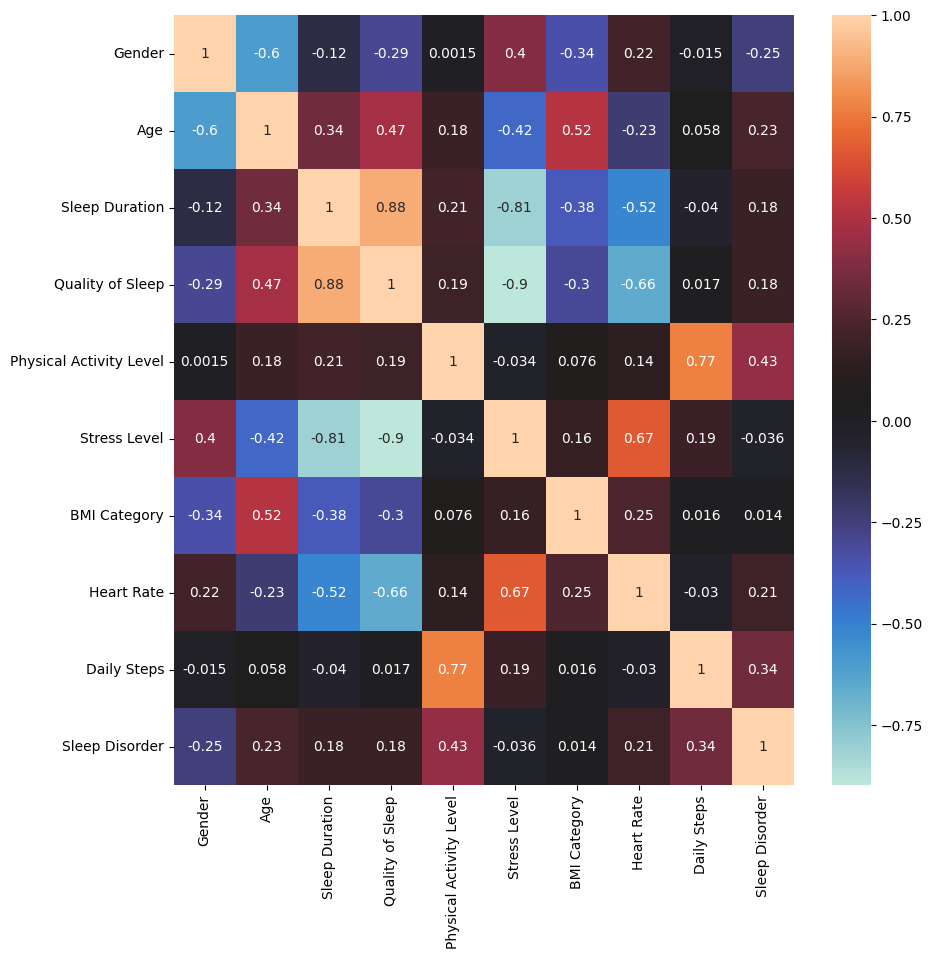

In [257]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='icefire')

### Scatter analisando a relação entre duração e qualidade do sono

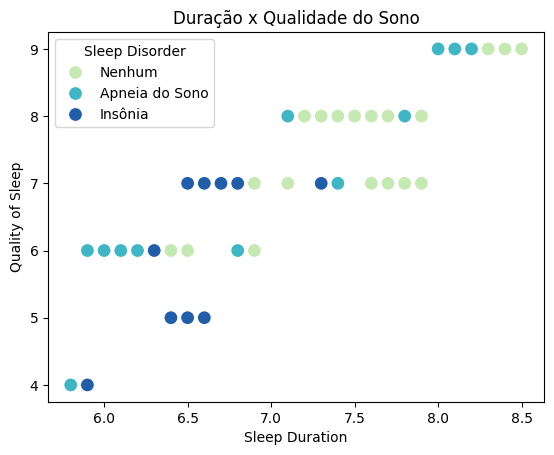

In [258]:
map_disorders = {0: "Insônia", 1: "Nenhum", 2: "Apneia do Sono"}

sns.scatterplot(data=df, x='Sleep Duration', y='Quality of Sleep', hue=df['Sleep Disorder'].map(map_disorders), palette="YlGnBu", s=100)
plt.title('Duração x Qualidade do Sono')
plt.show()

### Scatter analisando a relação entre duração do sono e nível de estresse

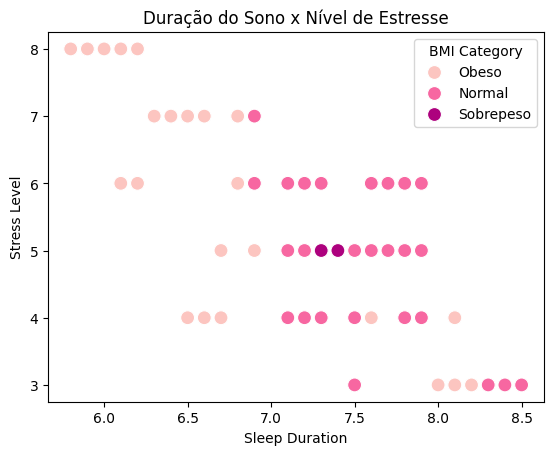

In [259]:
map_bmi = {0: "Normal", 1: "Sobrepeso", 2: "Obeso"}

sns.scatterplot(data=df, x='Sleep Duration', y='Stress Level', hue=df['BMI Category'].map(map_bmi), palette="RdPu", s=100)
plt.title('Duração do Sono x Nível de Estresse')
plt.show()

### Barplot analisando a relação da qualidade do sono e as doenças do sono, dividido por gênero

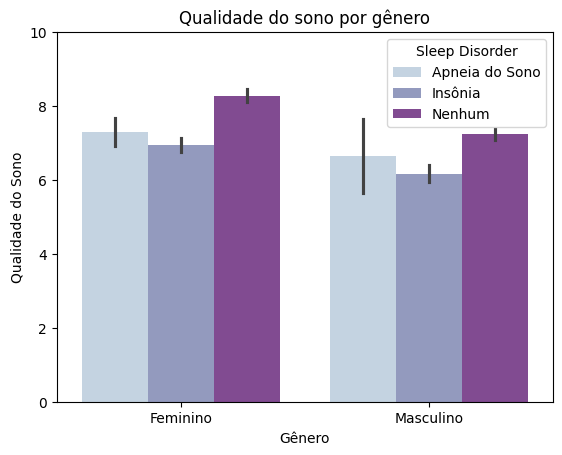

In [260]:
sns.barplot(data=df, x='Gender', y='Quality of Sleep', hue=df['Sleep Disorder'].map(map_disorders), palette="BuPu")

plt.title('Qualidade do sono por gênero')
plt.ylabel('Qualidade do Sono')
plt.xlabel('Gênero')
plt.xticks([0, 1], ['Feminino', 'Masculino'])
plt.ylim(0, 10)
plt.show()

### Separando os dados para treinamento, para prever Stress Level

In [261]:
x_sleep = df.iloc[:, [0,1,2,3,4,6,7,8,9]].values
y_sleep = df.iloc[:, 5].values

### Separando dados entre teste e treinamento, sendo 30% para treinamento

In [262]:
from sklearn.model_selection import train_test_split
x_sleep_train, x_sleep_test, y_sleep_train, y_sleep_test = train_test_split(x_sleep, y_sleep, test_size=0.3, random_state=0)

x_sleep_train.shape, x_sleep_test.shape

((261, 9), (113, 9))

### Testando o modelo de Regressão Linear

In [263]:
from sklearn.tree import DecisionTreeRegressor
regression_multiple_sleep = DecisionTreeRegressor()
regression_multiple_sleep.fit(x_sleep_train, y_sleep_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


### Medindo a qualidade do treinamento dos dados com o algoritmo

In [264]:
regression_multiple_sleep.score(x_sleep_train, y_sleep_train)

1.0

### E a qualidade dos dados de treinamento

In [265]:
regression_multiple_sleep.score(x_sleep_test, y_sleep_test)

0.975347845057449

### Fazendo as previsões com os dados que separamos para teste, para comparar com os valores reais

In [266]:
predictions = regression_multiple_sleep.predict(x_sleep_test)
predictions = np.round(predictions)
predictions

array([4., 8., 7., 5., 4., 4., 7., 5., 8., 8., 3., 5., 8., 8., 3., 5., 8.,
       6., 3., 3., 5., 6., 7., 7., 3., 8., 7., 4., 7., 8., 3., 4., 8., 7.,
       4., 5., 6., 5., 8., 6., 8., 8., 7., 3., 6., 8., 3., 3., 8., 6., 4.,
       6., 4., 5., 6., 8., 5., 6., 4., 5., 4., 6., 7., 7., 4., 8., 8., 8.,
       7., 7., 5., 6., 6., 3., 3., 7., 8., 8., 5., 8., 5., 7., 8., 3., 6.,
       7., 6., 3., 5., 6., 3., 3., 8., 4., 3., 3., 4., 6., 5., 4., 6., 4.,
       5., 4., 4., 8., 4., 8., 3., 7., 3., 8., 3.])

In [267]:
y_sleep_test

array([4, 8, 7, 5, 4, 4, 7, 5, 8, 8, 3, 5, 8, 8, 3, 5, 8, 6, 3, 3, 5, 6,
       7, 7, 3, 8, 7, 4, 7, 8, 3, 4, 8, 7, 4, 5, 6, 5, 8, 6, 8, 8, 7, 3,
       6, 8, 3, 3, 8, 6, 4, 6, 4, 5, 6, 8, 5, 6, 4, 5, 4, 6, 7, 7, 4, 8,
       8, 8, 7, 7, 5, 6, 6, 3, 3, 7, 8, 8, 5, 8, 5, 5, 8, 3, 6, 7, 6, 3,
       5, 6, 3, 3, 8, 4, 3, 3, 4, 6, 5, 4, 6, 4, 5, 6, 4, 8, 4, 8, 3, 6,
       3, 8, 3])

### Métricas de Erro: **Mean Absolute Error** e **Mean Squared Error**

In [268]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_sleep_test, predictions)
mse = mean_squared_error(y_sleep_test, predictions)
print(f"MAE: {mae} | MSE: {mse}")

MAE: 0.04424778761061947 | MSE: 0.07964601769911504
